<div style="float: right; margin: 0px 15px 15px 0px; text-align: center;">
   
</div>
<B style="list-style-type: none; font-size: 36px; color: black; margin-top: 0;">Individual Assignment </B><br>
<em style="color: #808080;"> <strong>Python for Data Analysts</strong></em><br><br>

<br>
<div style="float: left; margin: 0px 15px 15px 0px;">
	<img src="https://upload.wikimedia.org/wikipedia/commons/b/b6/HULT_IBS_Logo_Outline_Black_%28cropped%29.png" width=150/>

<span style="color: #808080;"><b></b> Hult International Business School <br></span>
<span style="color: #808080;"><b></b> Dual Master in Business Analytics <br></span>
<span style="color: #808080;"><b></b> Lilian Bonilla<br></span>

## Introduction 

### Ignore warnings

In [1]:
import warnings
warnings.filterwarnings("ignore")

### Basic Libraries To Manipulate Data

In [2]:
import matplotlib.pyplot as plt   
import numpy as np  
import pandas as pd  
import seaborn as sns
import plotly.express as px 

### Database Path

In [3]:
data_path = "./Data/"
sleephealth_filename = "Sleep_health_and_lifestyle_dataset.csv"
sleephealth_df_data = pd.read_csv(data_path + sleephealth_filename)
sleephealth_df = sleephealth_df_data.copy()

# Data Cleaning

### Data Sample

In [4]:
pd.set_option('display.max_columns', None)
sleephealth_df.sample(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
14,15,Male,29,Doctor,6.0,6,30,8,Normal,120/80,70,8000,NaN
30,31,Female,30,Nurse,6.4,5,35,7,Normal Weight,130/86,78,4100,Sleep Apnea
27,28,Male,30,Doctor,7.9,7,75,6,Normal,120/80,70,8000,NaN
242,243,Male,44,Salesperson,6.4,6,45,7,Overweight,130/85,72,6000,Insomnia
106,107,Female,37,Nurse,6.1,6,42,6,Overweight,126/83,77,4200,NaN


### Missing Values

In [5]:
missing_values = sleephealth_df.isnull().sum()
missing_values

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [6]:
# Show the components of the column Sleep Disorder, including the NaN 
sleephealth_df['Sleep Disorder'].value_counts(dropna=False) 

Sleep Disorder
NaN            219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

The Sleep Disorder column stands out with the highest number of null values, which is understandable given that not a lot of people typically have a sleeping disorder such as Apnea and Insomnia. This are not missing values, the nulls reflect the ones who does not have a sleep disorder.

### Transforming column Sleep Disorder

In [7]:
sleephealth_df['Sleep Disorder'] = sleephealth_df['Sleep Disorder'].fillna('None')
sleephealth_df.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Since the nulls are refering to people that not have any sleep disorder, it is better to tag them as None.

### Duplicate Entries

In [8]:
duplicate_rows = sleephealth_df.duplicated().sum()
duplicate_rows

0

### Checking Datatypes

In [9]:
sleephealth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Some of the variables have an incorrect data type, this must be fixed. 
Gender, Occupation, BMI Category, Blood Pressure and Sleep Disorder are categorical variables.

### Converting Datatypes

In [10]:
categorical_columns = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']

for col in categorical_columns:
    sleephealth_df[col] = sleephealth_df[col].astype('category')

### Datatype Validation

In [11]:
sleephealth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Person ID                374 non-null    int64   
 1   Gender                   374 non-null    category
 2   Age                      374 non-null    int64   
 3   Occupation               374 non-null    category
 4   Sleep Duration           374 non-null    float64 
 5   Quality of Sleep         374 non-null    int64   
 6   Physical Activity Level  374 non-null    int64   
 7   Stress Level             374 non-null    int64   
 8   BMI Category             374 non-null    category
 9   Blood Pressure           374 non-null    category
 10  Heart Rate               374 non-null    int64   
 11  Daily Steps              374 non-null    int64   
 12  Sleep Disorder           374 non-null    category
dtypes: category(5), float64(1), int64(7)
memory usage: 26.9 KB


All the data types are correct now. 

### Data Exploration

In [12]:
# Numerical variables
sleephealth_df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


From this output it can be highlighted:
- The average age in the study is 42, the youngest person has 27 year and the oldest 59. Three-quarters of them being less than 50 years old.
- Half of the people in the study report a sleep duration between 6.4 and 7.8 hours, being the total average is 7.1.
- The self-reported quality of sleep is at a high level, since 50% reported 7 out of 10 and the lowest value is 4 out of 10.
- The average of physical activity level is 59 minutes per day with a minimun 30 minutes. This suggest that the people in the survey can be considere actives.
- The self-reported stress level varies between 3 and 8 out of 10. 50% report a middle level of stress (between 4 and 7 out of 10)
- The average heart rate is 70 beats per minutes.
- Half of people in the study take between 5600 and 8000 steps per day, with a total average of 6,816 steps.

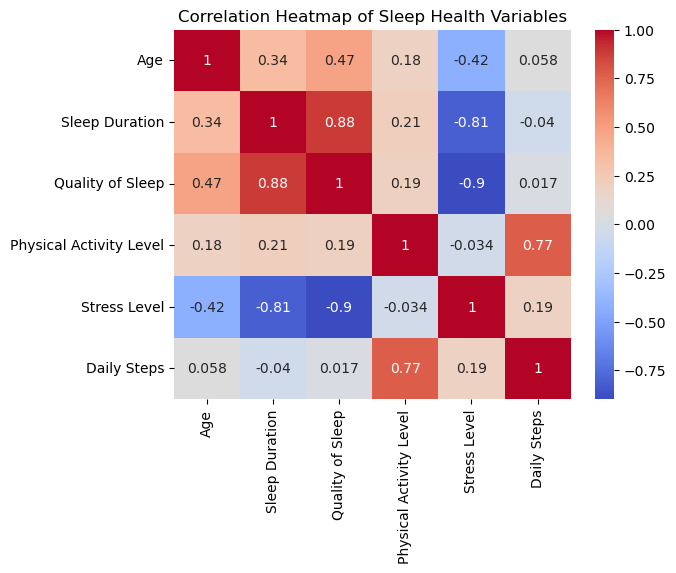

In [13]:
# Correlation Analysis
numeric_df = sleephealth_df[['Age','Sleep Duration','Quality of Sleep','Physical Activity Level', 'Stress Level', 'Daily Steps']] 
correlation_matrix = numeric_df.corr() 
sns.heatmap(correlation_matrix, annot=True,cmap= 'coolwarm') 
plt.title('Correlation Heatmap of Sleep Health Variables')
plt.show() 

The heatmap presents a clear correlation matrix that underscores significant relationships:
- Between Sleep duration and Quality of sleep: Strong positive correlation, people who sleep more hours percieve to have a better sleep quality.
- Between Quality of sleep and Stress level: Strong negative correlation, people who have a low quality of sleep feel more stress. The same happens between Sleep duration and Stress level.

The heatmap show a low correlation between Quality of sleep and Physical activity level / Daily steps.

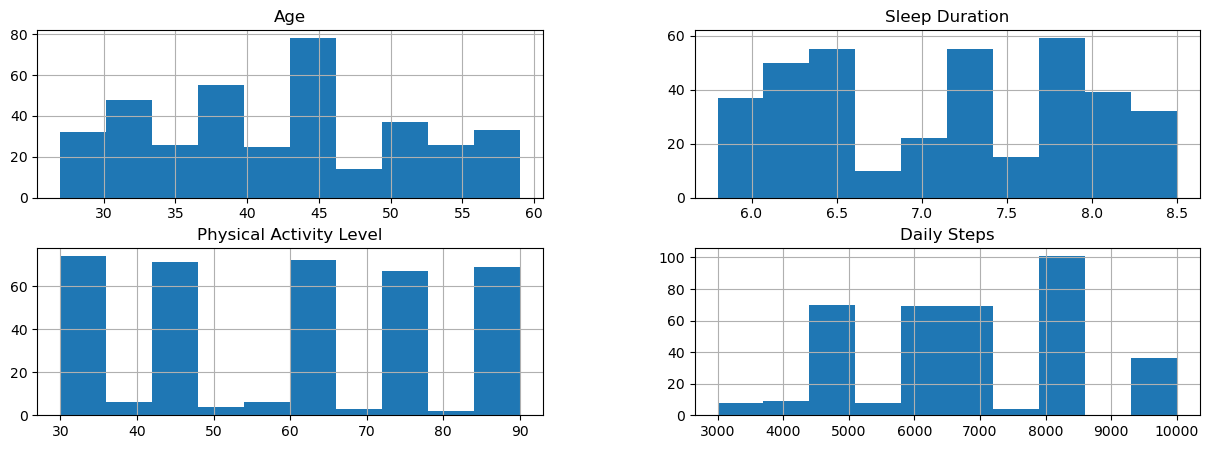

In [14]:
# Histogram
sleephealth_df[['Age','Sleep Duration', 'Physical Activity Level', 'Daily Steps']].hist(figsize=(15,5)) 
plt.show()

- The mayority of the people in the survey seems to be concentrated in an addult age between 30 and 45 years old.
- The three most common sleep durations ate 6.5, 7.2 and 7.8 hours.
- The Pysical activity level can be categories in groups to have a better analysis.
- There is a concentration of daily steps at the level of 8000.

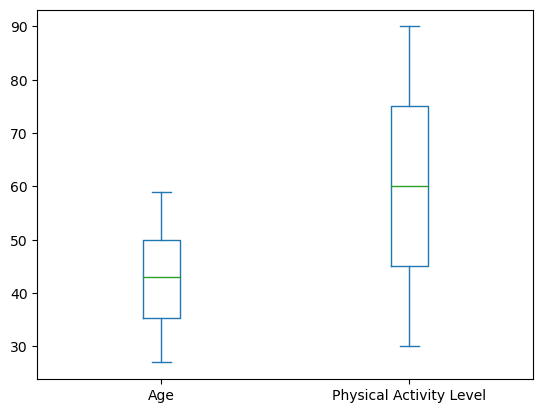

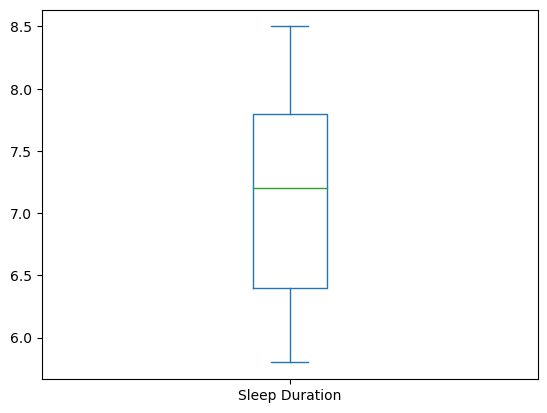

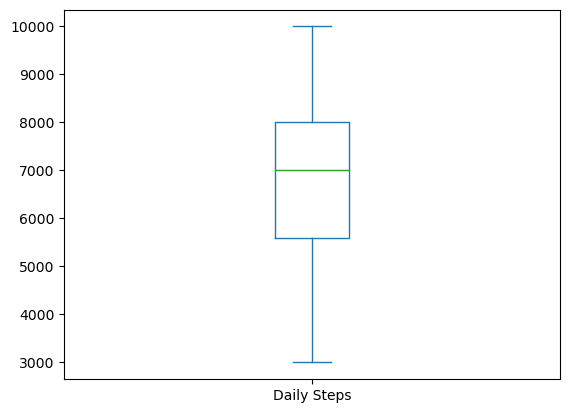

In [15]:
# Outliers
sleephealth_df[['Age', 'Physical Activity Level']].plot(kind='box');
sleephealth_df[['Sleep Duration']].plot(kind='box');
sleephealth_df[['Daily Steps']].plot(kind='box');

This is another way to verify that there are not outliers in this variables.

In [16]:
# Analysis of Categorical Variables
# Ocupations
sleephealth_df['Occupation'].value_counts(dropna=True) 

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

For further analysis the occupations that must not be taken into consideration are: Scientist, Software Engineer, Sales Representative and Manager.

In [17]:
# BMI Category
sleephealth_df['BMI Category'].value_counts(dropna=True) 

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

In [18]:
# Create a dictionary
replace_dict_cat={'Normal Weight': 'Normal', 'Obese':'Overweight'}

In [19]:
sleephealth_df['BMI Category']=sleephealth_df['BMI Category'].replace(replace_dict_cat)

In [20]:
# Validation
sleephealth_df['BMI Category'].value_counts(dropna=True) 

BMI Category
Normal        216
Overweight    158
Name: count, dtype: int64

There is not underweigth people in the survey. It would be interesting to explore the relationship of this variable with the ones related to the sleep duration and sleep disorders.

In [21]:
# Sleep disorders
sleephealth_df['Sleep Disorder'].value_counts(dropna=True) 

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

Most of the people does not suffer of any sleep disorder but the data have information about individuals suffering of Apnea and Insomnia that could provide useful insigths.

In [22]:
# Gender
sleephealth_df['Gender'].value_counts(dropna=True) 

Gender
Male      189
Female    185
Name: count, dtype: int64

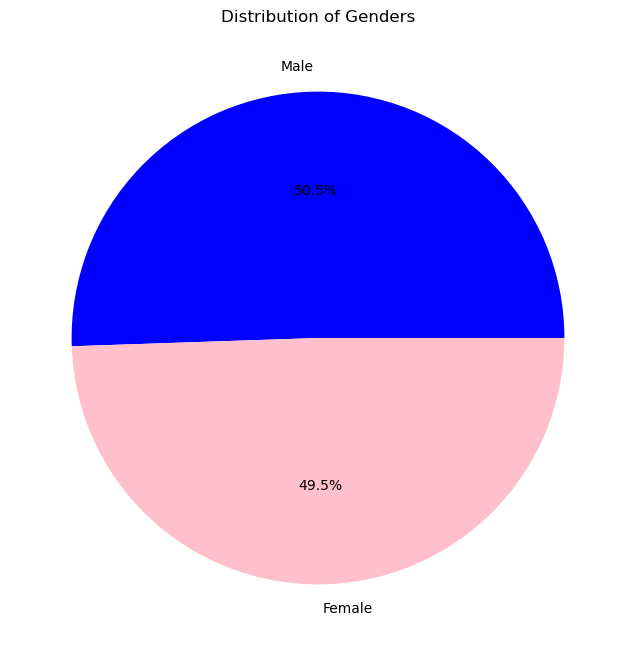

In [23]:
# Count the components of the column Gender
gender_counts = sleephealth_df['Gender'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['blue', 'pink'])
plt.title('Distribution of Genders')
plt.show()

There seems to be equal proportion of male and female among the people in the survey.

# Analysis

### Age groups

In [24]:
bins= [0, 30, 40, 50, float('inf')]
labels = ['Young Adult (-30)', 'Adult (30-40)', 'Middle Aged (40-50)', 'Senior (50+)']

# Create a new column
sleephealth_df['Age Group'] = pd.cut(sleephealth_df['Age'], bins=bins, labels=labels)
sleephealth_df[['Age','Age Group']]

,Age,Age Group
0,27,Young Adult (-30)
1,28,Young Adult (-30)
2,28,Young Adult (-30)
3,28,Young Adult (-30)
4,28,Young Adult (-30)
...,...,...
369,59,Senior (50+)
370,59,Senior (50+)
371,59,Senior (50+)
372,59,Senior (50+)


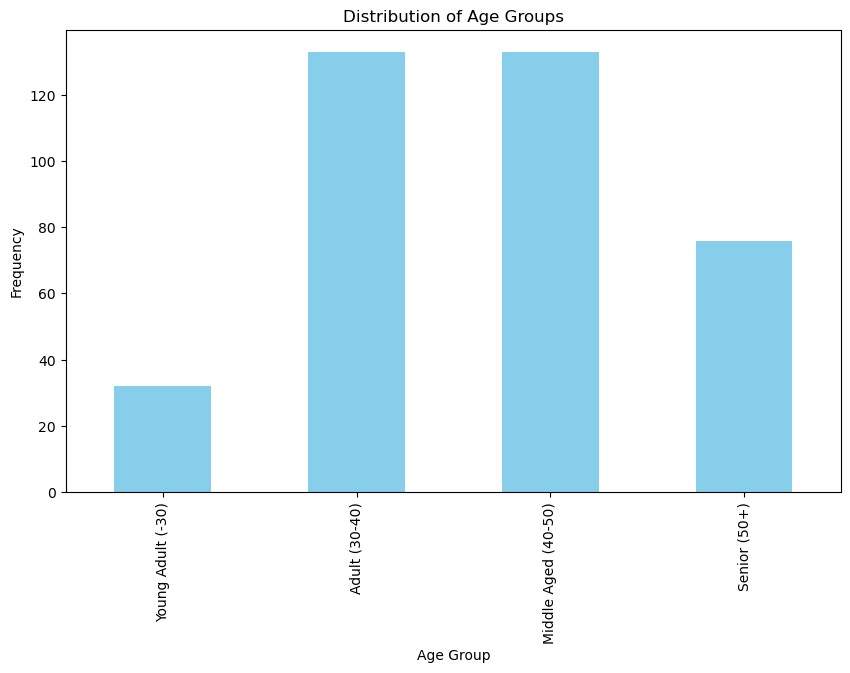

In [25]:
# Count the people of each 'Age Group'
age_group_order = ['Young Adult (-30)', 'Adult (30-40)', 'Middle Aged (40-50)', 'Senior (50+)']
age_group_counts = sleephealth_df['Age Group'].value_counts().loc[age_group_order]

# Plotting a bar chart
age_group_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.show()

 The largest study participation comes from the adult and middle aged demographics

In [26]:
bins= [0, 6, 7, 8, float('inf')]
labels = ['Below recommended (-6)', 'Appropiate (6-7)','Recomended (7-8)', 'Above recommended (8+)']

# Create a new column
sleephealth_df['Sleep Duration Group'] = pd.cut(sleephealth_df['Sleep Duration'], bins=bins, labels=labels)
sleephealth_df[['Sleep Duration','Sleep Duration Group']]

,Sleep Duration,Sleep Duration Group
0,6.1,Appropiate (6-7)
1,6.2,Appropiate (6-7)
2,6.2,Appropiate (6-7)
3,5.9,Below recommended (-6)
4,5.9,Below recommended (-6)
...,...,...
369,8.1,Above recommended (8+)
370,8.0,Recomended (7-8)
371,8.1,Above recommended (8+)
372,8.1,Above recommended (8+)


In [27]:
# Count
sleephealth_df['Sleep Duration Group'].value_counts(dropna=True) 

Sleep Duration Group
Recomended (7-8)          161
Appropiate (6-7)          118
Above recommended (8+)     58
Below recommended (-6)     37
Name: count, dtype: int64

In [28]:
# Calculate proportions for each age group and sleep duration categories
grouped = sleephealth_df.groupby(['Age Group', 'Sleep Duration Group']).size().unstack(fill_value=0) #Any missing value = 0
proportions = grouped.div(grouped.sum(axis=1), axis = 0)
proportions

Sleep Duration Group,Below recommended (-6),Appropiate (6-7),Recomended (7-8),Above recommended (8+)
Age Group,,,,
Young Adult (-30),0.218750,0.312500,0.468750,0.000000
Adult (30-40),0.120301,0.150376,0.729323,0.000000
Middle Aged (40-50),0.097744,0.601504,0.278195,0.022556
Senior (50+),0.013158,0.105263,0.157895,0.723684


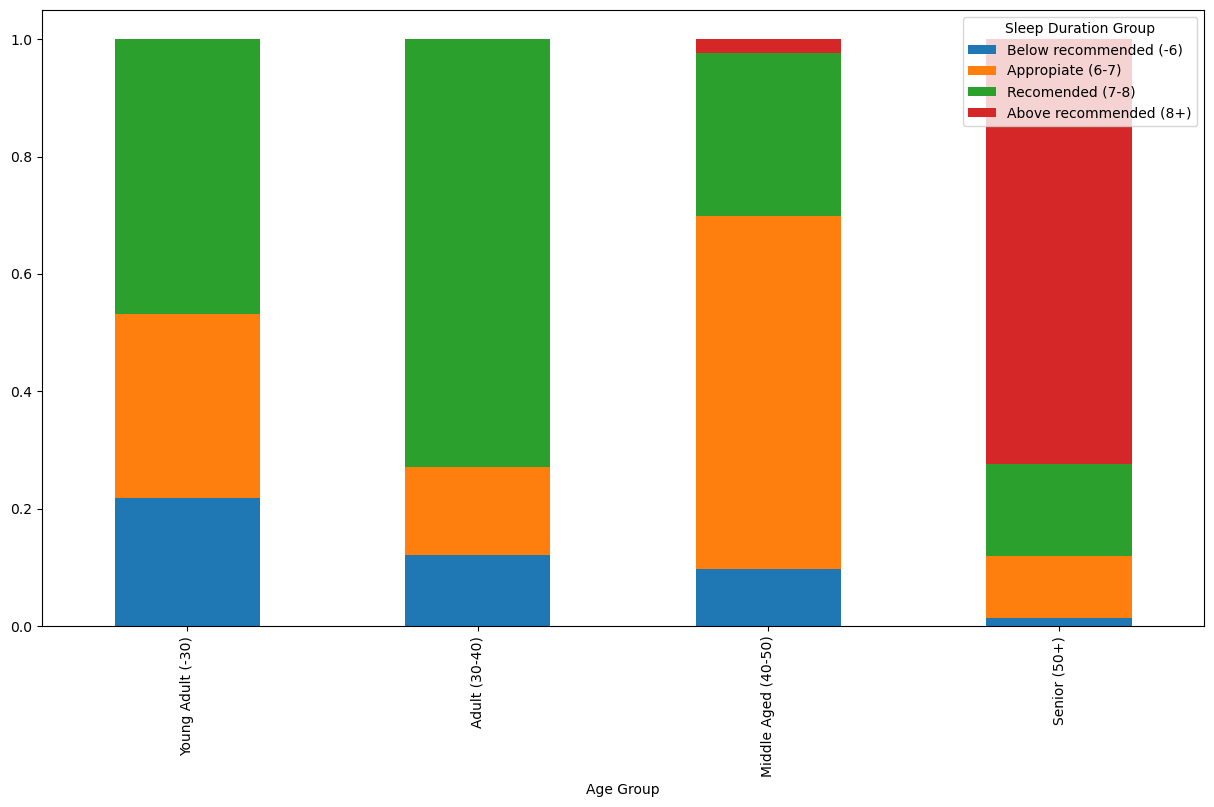

In [29]:
proportions.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.show()

In the case of young adults and adults they seem to sleep the recommended hours in the mayority.
Most of the middle aged tend to sleep between 6 and 7 hours, still appropiate; however, the senior level primarly sleep above the recommended hours.

### BMI groups

In [30]:
# Pivot Table to check the average sleep hours by BMI Category
avg_bmi_sleep = pd.pivot_table(sleephealth_df, values='Sleep Duration', index='BMI Category', aggfunc='mean')
avg_bmi_sleep

,Sleep Duration
BMI Category,
Normal,7.387963
Overweight,6.782278


Participants with overweight sleep less hours in general.

In [31]:
bins= [0, 5, 7, float('inf')]
labels = ['Low quality (-5)', 'Appropiate quality (5-7)','High quality (7+)']

# Create a new column
sleephealth_df['Sleep Quality Group'] = pd.cut(sleephealth_df['Quality of Sleep'], bins=bins, labels=labels)
sleephealth_df[['Sleep Quality Group','Quality of Sleep']]

,Sleep Quality Group,Quality of Sleep
0,Appropiate quality (5-7),6
1,Appropiate quality (5-7),6
2,Appropiate quality (5-7),6
3,Low quality (-5),4
4,Low quality (-5),4
...,...,...
369,High quality (7+),9
370,High quality (7+),9
371,High quality (7+),9
372,High quality (7+),9


In [32]:
# Calculate proportions for each BMI category and sleep quality
grouped_bmi_sq = sleephealth_df.groupby(['BMI Category', 'Sleep Quality Group']).size().unstack(fill_value=0) #Any missing value = 0
proportions_bmi_sq = grouped_bmi_sq.div(grouped_bmi_sq.sum(axis=1), axis = 0)
proportions_bmi_sq

Sleep Quality Group,Low quality (-5),Appropiate quality (5-7),High quality (7+)
BMI Category,,,
Normal,0.018519,0.314815,0.666667
Overweight,0.050633,0.721519,0.227848


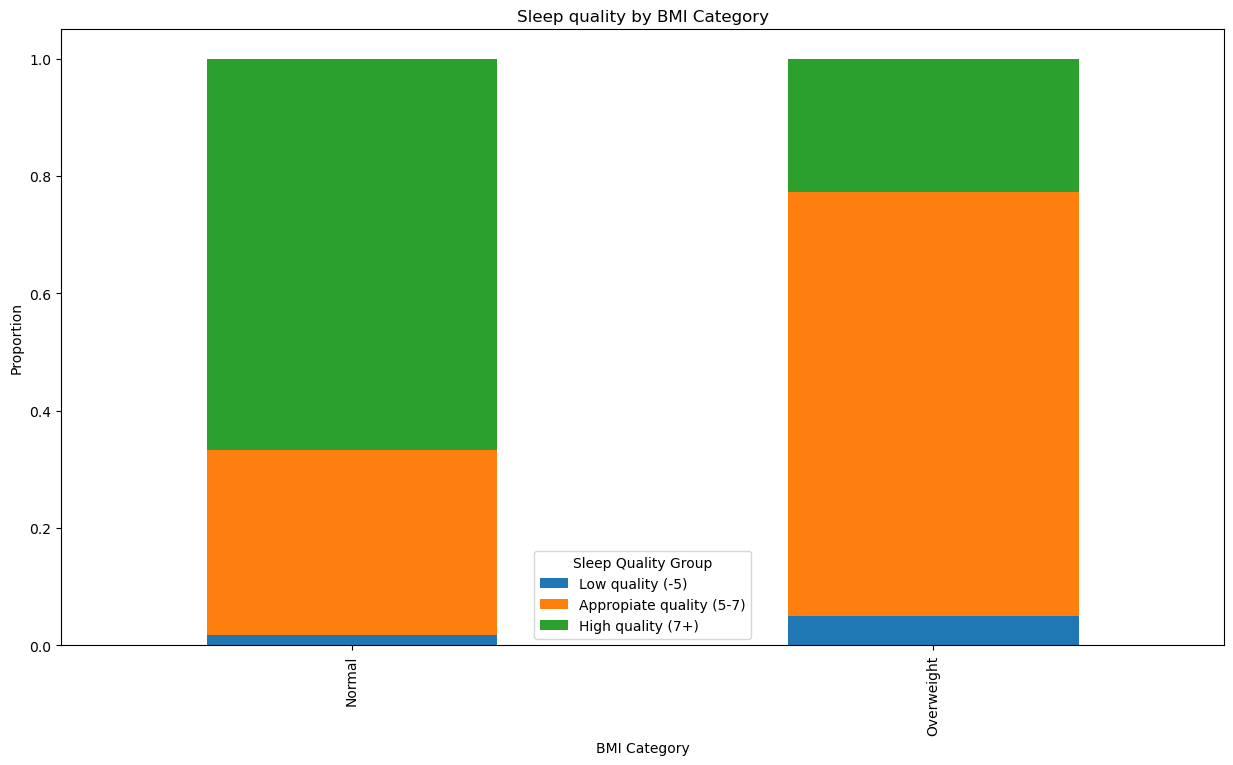

In [33]:
proportions_bmi_sq.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.ylabel('Proportion')
plt.title('Sleep quality by BMI Category')
plt.show()

The weight impacts the quality of sleep of the individuals in the survey, where the ones in the normal category reported to have better quality than the ones with overweight.

### Sleeping disorders

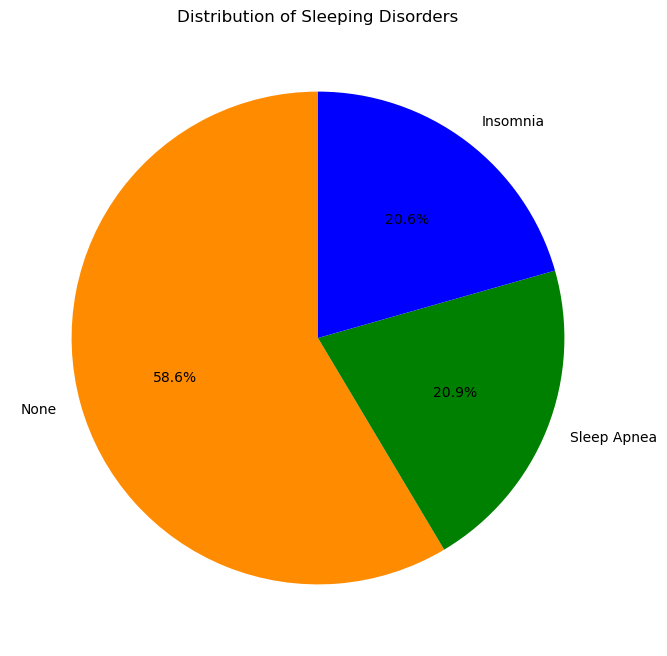

In [34]:
sleep_disorder_counts = sleephealth_df['Sleep Disorder'].value_counts()

# Plotting a pie chart
custom_colors = ['darkorange', 'green', 'blue']
sleep_disorder_counts.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8), colors=custom_colors)
plt.title('Distribution of Sleeping Disorders')
plt.ylabel('')  # Removes the default 'Sleep Disorder' label on the y-axis
plt.show()

Although most of the participants do not have sleep disorders, 41.5% present Insominia and Apnea. Taking this into consideration, there is an opportunity to explore this market in greater detail.
The sleeping disorders are equaly distributed among the participants.

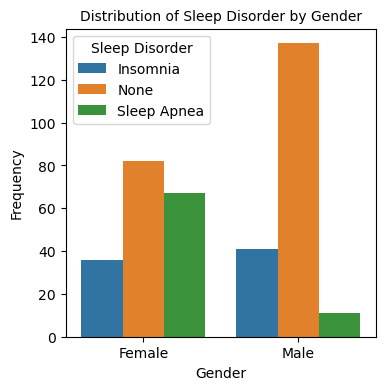

In [35]:
plt.figure(figsize=(4,4))
sns.countplot(data=sleephealth_df, x='Gender', hue='Sleep Disorder')
plt.title('Distribution of Sleep Disorder by Gender', fontsize=10)
plt.ylabel('Frequency')
plt.show()

Women present significantly higher cases of Sleep Apnea. In the case of Insomnia, men has slightly higer cases.

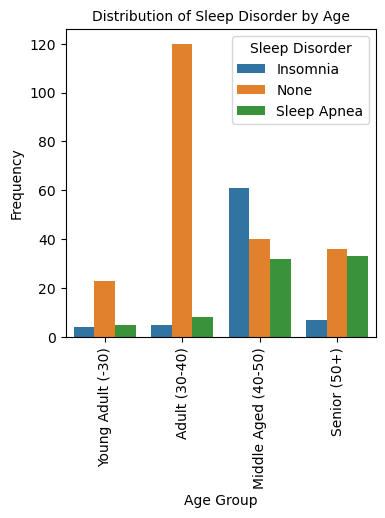

In [36]:
plt.figure(figsize=(4,4))
sns.countplot(data=sleephealth_df, x='Age Group', hue='Sleep Disorder')
plt.title('Distribution of Sleep Disorder by Age', fontsize=10)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

The sleep disorders are more concentrated in the middle agged group, being the Insomnia the most common for this population.

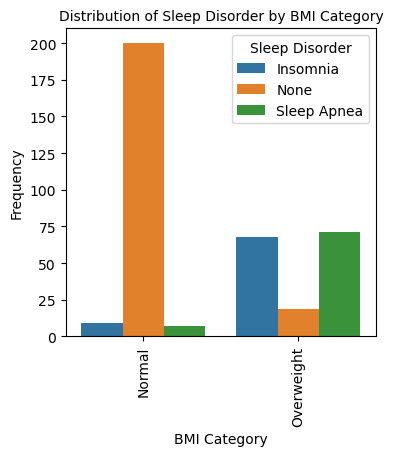

In [37]:
plt.figure(figsize=(4,4))
sns.countplot(data=sleephealth_df, x='BMI Category', hue='Sleep Disorder')
plt.title('Distribution of Sleep Disorder by BMI Category', fontsize=10)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

Overweight people present more sleep disorders, for both Insomnia and Sleep Apnea.

In [38]:
# Reshaping
tidy_format = pd.melt(sleephealth_df, id_vars='Sleep Disorder', 
            value_vars='Sleep Duration')

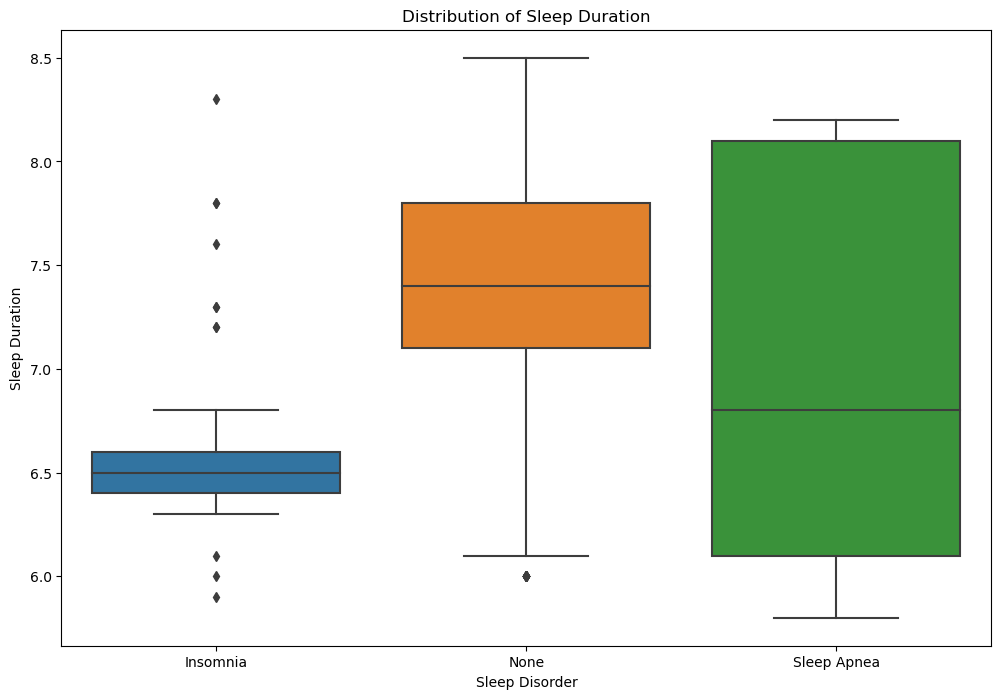

In [39]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Sleep Disorder', y='value', data=tidy_format)
plt.title('Distribution of Sleep Duration', fontsize=12)
plt.xlabel('Sleep Disorder')
plt.ylabel('Sleep Duration')
plt.show()

People without sleep disorders sleep longer hours in average. 
People with Apnea tend to have a wider range of sleep hours, with an average below the one with any sleep disorders.
People with Insomnia sleep fewer hours with a the shortest sleep hours range.

In [40]:
# Pivot Table to check the average by sleeping disorders
avg_quality_sleep = pd.pivot_table(sleephealth_df, values=['Physical Activity Level','Daily Steps','Stress Level'], index='Sleep Disorder', aggfunc=['mean'])
avg_quality_sleep

mean                                     
                Daily Steps Physical Activity Level Stress Level
Sleep Disorder                                                  
Insomnia        5901.298701               46.818182     5.870130
None            6852.968037               57.949772     5.114155
Sleep Apnea     7619.230769               74.794872     5.666667

There is not a clear relationship between the physical activity level, the daily steps and the stress level. This also was proved in the correlation matrix, so we can not extract more value from this variables.

## Recomendations

- It is important to collect more data from the senior population since they are the second group most affected with sleeping disorders.
- Women present more sleeping disorders in general but with a higher concentration in Apnea cases.
- Weight management is key for people with sleeping disorders since it would improve the quantity and quality of their sleep, and therefore their stress levels.
- Expand research to find more variables that affect the sleeping habits of populations with these disorders it is necessary to create more recommendations.